In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
from mafContrib import Plasticc_metric, plasticc_slicer
from lsst.sims.utils import _healbin
import healpy as hp

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
runName = 'baseline_1exp_pairsmix_10yrs'
#runName = 'roll_mod3_sdf0.20mixed_10yrs'
#runName = 'very_alt3_rm5illum20_10yrs'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sql=''
slicer1 = plasticc_slicer(model='SNIa-normal', badval=0)
slicer2 = plasticc_slicer(model='KN', seed=43, badval=0)


In [4]:
metric = Plasticc_metric(metricName='SNIa')
# Set the maskval so that we count missing objects as zero.
summary_stats = [metrics.MeanMetric(maskVal=0)]
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer1, sql, runName=runName, summaryMetrics=summary_stats,
                                   plotFuncs=plotFuncs)
bundleList.append(bundle)

metric = Plasticc_metric(metricName='KN')
bundle = metricBundles.MetricBundle(metric, slicer2, sql, runName=runName, summaryMetrics=summary_stats,
                                   plotFuncs=plotFuncs)
bundleList.append(bundle)



In [5]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'filter'].
Found 2609253 visits
Running:  ['baseline_1exp_pairsmix_10yrs_SNIa_USER']


/Users/yoachim/gitRepos/sims_maf_contrib/mafContrib/plasticcMetrics.py:110: RuntimeWarning: invalid value encountered in log10
  result[infilt] = -2.5*np.log10(result[infilt]) + zp
/Users/yoachim/gitRepos/sims_maf_contrib/mafContrib/plasticcMetrics.py:250: RuntimeWarning: invalid value encountered in less
  above_limit = np.where(full_lc < self.rmag_limit)


Completed metric generation.
Running:  ['baseline_1exp_pairsmix_10yrs_KN_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


Plotting complete.


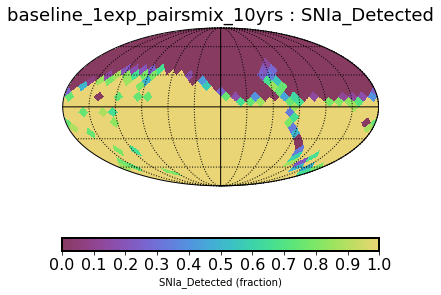

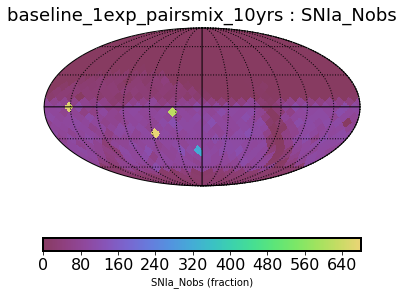

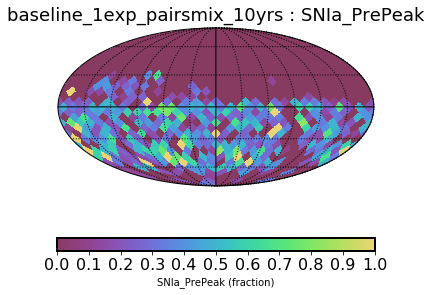

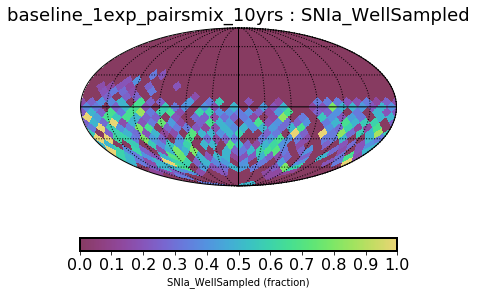

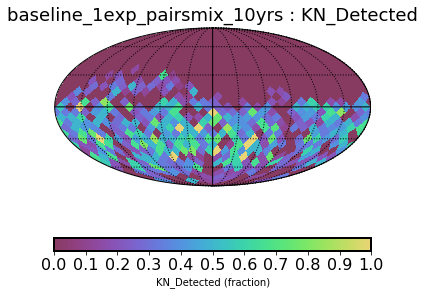

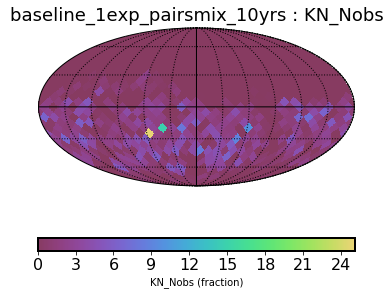

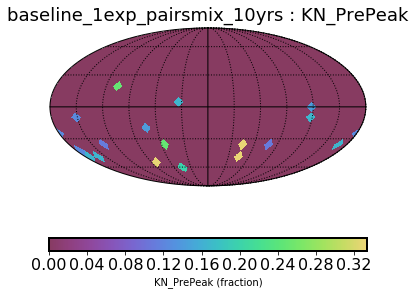

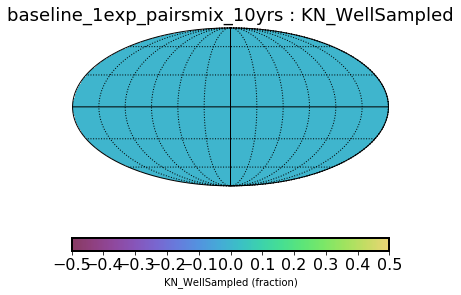

In [6]:
bgroup.plotAll(closefigs=False)

In [7]:
for key in bundleDict:
    print(key, bundleDict[key].summaryValues)


baseline_1exp_pairsmix_10yrs_SNIa_USER {}
baseline_1exp_pairsmix_10yrs_KN_USER {}
SNIa_Detected {'Mean': 0.62524999999999997}
SNIa_Nobs {'Mean': 47.074249999999999}
SNIa_PrePeak {'Mean': 0.18575}
SNIa_WellSampled {'Mean': 0.17774999999999999}
KN_Detected {'Mean': 0.20974999999999999}
KN_Nobs {'Mean': 1.1412500000000001}
KN_PrePeak {'Mean': 0.0044999999999999997}
KN_WellSampled {'Mean': 0.0}


In [8]:
ack = _healbin(slicer1.slicePoints['ra'],slicer1.slicePoints['dec'],
               bundleDict['SNIa_WellSampled'].metricValues, nside=8,
               reduceFunc=np.mean)
              

/Users/yoachim/gitRepos/sims_utils/python/lsst/sims/utils/healpyUtils.py:140: UserWarning: Warning: converting a masked element to nan.
  mapVals[idx] = reduceFunc(values[left[i]:right[i]])


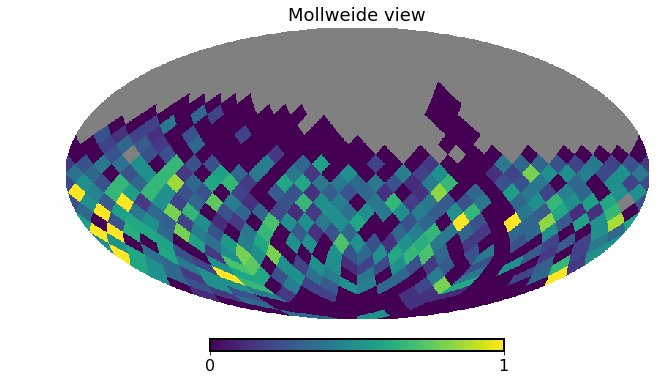

In [9]:
hp.mollview(ack)

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


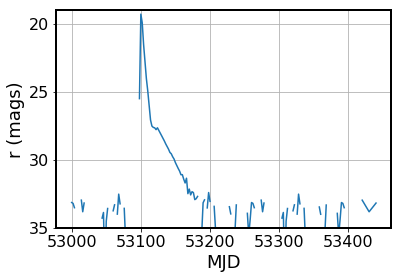

In [10]:
plt.plot(slicer2.slicePoints['plc'][0]['r']['mjd'], -2.5*np.log10(slicer2.slicePoints['plc'][0]['r']['fluxcal'])+27.5 )
plt.ylim([35,19])
plt.xlabel('MJD')
plt.ylabel('r (mags)')